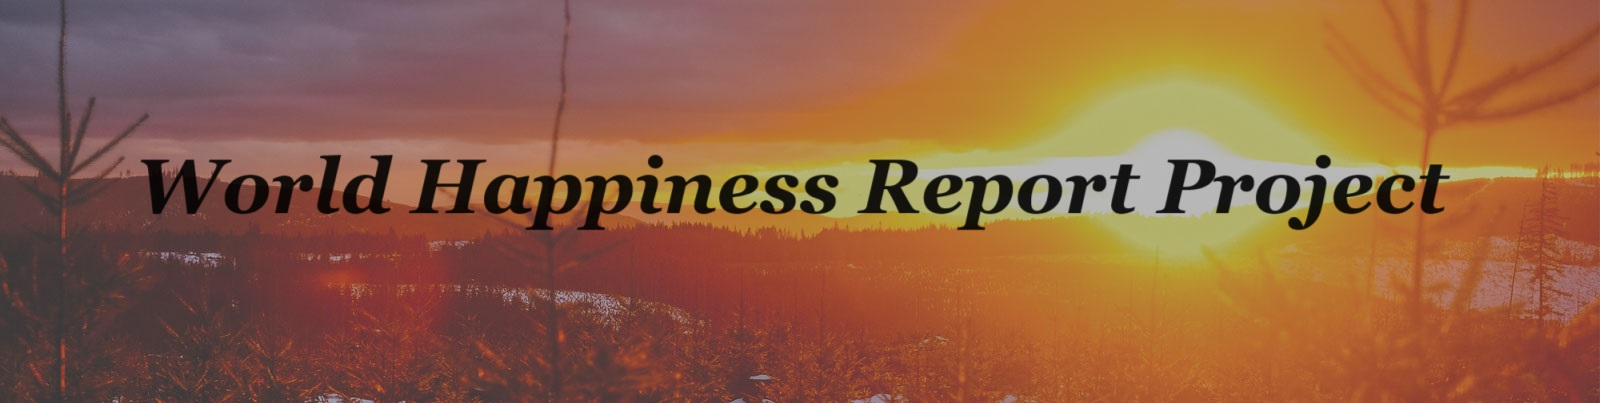

Dataset:

The World Happiness Report is a landmark survey that ranks global happiness across countries, based on factors such as GDP per capita, social support, life expectancy, freedom, generosity, and corruption.This dataset contains 8 variables which determine the happiness score of a country/region. 

Input variables:

* Country: Name of the country.
* GDP per Capita: Economic performance.
* Family: Social support.
* Life Expectancy: Health and longevity.
* Freedom: Freedom to make life choices.
* Generosity: Generosity of the general population.
* Trust (Government Corruption): Perception of corruption.
* Dystopia Residual: Benchmark value added to the residual value for each country.

The columns: GDP per Capita, Family, Life Expectancy, Freedom, Generosity, Trust Government Corruption describe the extent to which these factors contribute in evaluating the happiness in each country.

Output variable:

* Happiness Score: The measure of national happiness. 

Aim:

Analyse the World Happiness Report dataset  
Develop a machine learning model to predict happiness score (Regression model)

In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import pickle
from sklearn import metrics
from sklearn.model_selection import train_test_split
from sklearn.model_selection import cross_val_score

import warnings
warnings.filterwarnings('ignore')

In [3]:
happy_df=pd.read_csv('https://raw.githubusercontent.com/FlipRoboTechnologies/ML-Datasets/main/World%20Happiness/happiness_score_dataset.csv')
happy_df.head()

,Country,Region,Happiness Rank,Happiness Score,Standard Error,Economy (GDP per Capita),Family,Health (Life Expectancy),Freedom,Trust (Government Corruption),Generosity,Dystopia Residual
0,Switzerland,Western Europe,1,7.587,0.03411,1.39651,1.34951,0.94143,0.66557,0.41978,0.29678,2.51738
1,Iceland,Western Europe,2,7.561,0.04884,1.30232,1.40223,0.94784,0.62877,0.14145,0.43630,2.70201
2,Denmark,Western Europe,3,7.527,0.03328,1.32548,1.36058,0.87464,0.64938,0.48357,0.34139,2.49204
3,Norway,Western Europe,4,7.522,0.03880,1.45900,1.33095,0.88521,0.66973,0.36503,0.34699,2.46531
4,Canada,North America,5,7.427,0.03553,1.32629,1.32261,0.90563,0.63297,0.32957,0.45811,2.45176


# Data pre-processing and EDA

In [4]:
# drop Standard Error
happy_df.drop(columns=['Standard Error'],inplace=True)

In [5]:
happy_df.shape

(158, 11)

In [6]:
happy_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 158 entries, 0 to 157
Data columns (total 11 columns):
 #   Column                         Non-Null Count  Dtype  
---  ------                         --------------  -----  
 0   Country                        158 non-null    object 
 1   Region                         158 non-null    object 
 2   Happiness Rank                 158 non-null    int64  
 3   Happiness Score                158 non-null    float64
 4   Economy (GDP per Capita)       158 non-null    float64
 5   Family                         158 non-null    float64
 6   Health (Life Expectancy)       158 non-null    float64
 7   Freedom                        158 non-null    float64
 8   Trust (Government Corruption)  158 non-null    float64
 9   Generosity                     158 non-null    float64
 10  Dystopia Residual              158 non-null    float64
dtypes: float64(8), int64(1), object(2)
memory usage: 13.7+ KB


In [7]:
happy_df.describe()

,Happiness Rank,Happiness Score,Economy (GDP per Capita),Family,Health (Life Expectancy),Freedom,Trust (Government Corruption),Generosity,Dystopia Residual
count,158.000000,158.000000,158.000000,158.000000,158.000000,158.000000,158.000000,158.000000,158.000000
mean,79.493671,5.375734,0.846137,0.991046,0.630259,0.428615,0.143422,0.237296,2.098977
std,45.754363,1.145010,0.403121,0.272369,0.247078,0.150693,0.120034,0.126685,0.553550
min,1.000000,2.839000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.328580
25%,40.250000,4.526000,0.545808,0.856823,0.439185,0.328330,0.061675,0.150553,1.759410
50%,79.500000,5.232500,0.910245,1.029510,0.696705,0.435515,0.107220,0.216130,2.095415
75%,118.750000,6.243750,1.158448,1.214405,0.811013,0.549092,0.180255,0.309883,2.462415
max,158.000000,7.587000,1.690420,1.402230,1.025250,0.669730,0.551910,0.795880,3.602140


In [8]:
happy_df.isnull().sum()

Country                          0
Region                           0
Happiness Rank                   0
Happiness Score                  0
Economy (GDP per Capita)         0
Family                           0
Health (Life Expectancy)         0
Freedom                          0
Trust (Government Corruption)    0
Generosity                       0
Dystopia Residual                0
dtype: int64

Observations:   
    There are 158 records with no missing data in any columns.  
    Mean and median of all columns are almost the same indicating normal distribution of data.
    

In [9]:
# check number of unique values in each feature column
unique=happy_df.nunique()
pd.DataFrame(unique,columns=['No. of unique values'])

,No. of unique values
Country,158
Region,10
Happiness Rank,157
Happiness Score,157
Economy (GDP per Capita),158
Family,158
Health (Life Expectancy),157
Freedom,158
Trust (Government Corruption),157
Generosity,158


In [10]:
# check for duplicates
duplicates=happy_df.duplicated()

print('No. of duplicates in the dataset: ', happy_df.duplicated().sum())
print('Index of duplicates in the dataset: ', happy_df[duplicates].index)

No. of duplicates in the dataset:  0
Index of duplicates in the dataset:  Index([], dtype='int64')


In [11]:
# take the count of each unique value in each feature column
for i in happy_df.columns:
    print(happy_df.value_counts(happy_df[i]),'\n')

Country
Afghanistan                1
Palestinian Territories    1
Nicaragua                  1
Niger                      1
Nigeria                    1
                          ..
Guinea                     1
Haiti                      1
Honduras                   1
Hong Kong                  1
Zimbabwe                   1
Name: count, Length: 158, dtype: int64 

Region
Sub-Saharan Africa                 40
Central and Eastern Europe         29
Latin America and Caribbean        22
Western Europe                     21
Middle East and Northern Africa    20
Southeastern Asia                   9
Southern Asia                       7
Eastern Asia                        6
Australia and New Zealand           2
North America                       2
Name: count, dtype: int64 

Happiness Rank
82     2
1      1
110    1
103    1
104    1
      ..
54     1
55     1
56     1
57     1
158    1
Name: count, Length: 157, dtype: int64 

Happiness Score
5.192    2
2.839    1
5.948    1
5.828    1
5.

Observations:  
The dataset has maximum participation of countries from Sub-Saharan Africa region.  


In [12]:
# find countries with highest and lowest Happiness Score

grouped=happy_df.groupby('Country')['Happiness Score'].mean().reset_index()
sorted_grouped=grouped.sort_values(by='Happiness Score',ascending=False)

print('Top 10 countries with highest Happiness Score')
display(sorted_grouped.head(10))

print('Countries with lowest Happiness Score')
least_grouped=grouped.sort_values(by='Happiness Score',ascending=True)
display(least_grouped.head(10))

Top 10 countries with highest Happiness Score


,Country,Happiness Score
135,Switzerland,7.587
58,Iceland,7.561
37,Denmark,7.527
105,Norway,7.522
24,Canada,7.427
45,Finland,7.406
99,Netherlands,7.378
134,Sweden,7.364
100,New Zealand,7.286
6,Australia,7.284


Countries with lowest Happiness Score


,Country,Happiness Score
141,Togo,2.839
21,Burundi,2.905
136,Syria,3.006
13,Benin,3.340
118,Rwanda,3.465
0,Afghanistan,3.575
20,Burkina Faso,3.587
66,Ivory Coast,3.655
53,Guinea,3.656
26,Chad,3.667


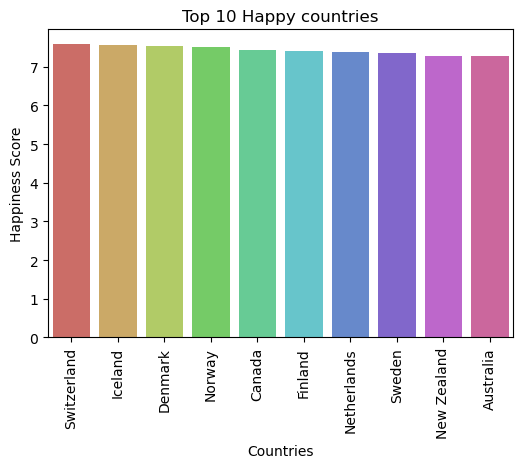

In [14]:
# plot Top 10 Happy countries

top_10_countries=sorted_grouped.head(10)
plt.figure(figsize=(6,4)) 
sns.barplot(x='Country',y='Happiness Score',data=top_10_countries,palette='hls')
plt.title('Top 10 Happy countries')
plt.xlabel('Countries')
plt.ylabel('Happiness Score')
plt.xticks(rotation=90)
plt.show()

Observation:  
    Switzerland is the happiest country according to the World Happiness Report with happiness score = 7.587.  
    Togo has the leas happiness score of 2.839

In [27]:
# find Regions with highest and lowest Happiness Score
grouped1=happy_df.groupby('Region')['Happiness Score'].mean().reset_index()
sorted_grouped1=grouped1.sort_values(by='Happiness Score',ascending=False)

print('Top 10 regions with highest Happiness Score')
display(sorted_grouped1.head(10))

print('Regions with lowest Happiness Score')
least_grouped1=grouped1.sort_values(by='Happiness Score',ascending=True)
display(least_grouped1.head(10))

Top 10 regions with highest Happiness Score


,Region,Happiness Score
0,Australia and New Zealand,7.285000
5,North America,7.273000
9,Western Europe,6.689619
3,Latin America and Caribbean,6.144682
2,Eastern Asia,5.626167
4,Middle East and Northern Africa,5.406900
1,Central and Eastern Europe,5.332931
6,Southeastern Asia,5.317444
7,Southern Asia,4.580857
8,Sub-Saharan Africa,4.202800


Regions with lowest Happiness Score


,Region,Happiness Score
8,Sub-Saharan Africa,4.202800
7,Southern Asia,4.580857
6,Southeastern Asia,5.317444
1,Central and Eastern Europe,5.332931
4,Middle East and Northern Africa,5.406900
2,Eastern Asia,5.626167
3,Latin America and Caribbean,6.144682
9,Western Europe,6.689619
5,North America,7.273000
0,Australia and New Zealand,7.285000


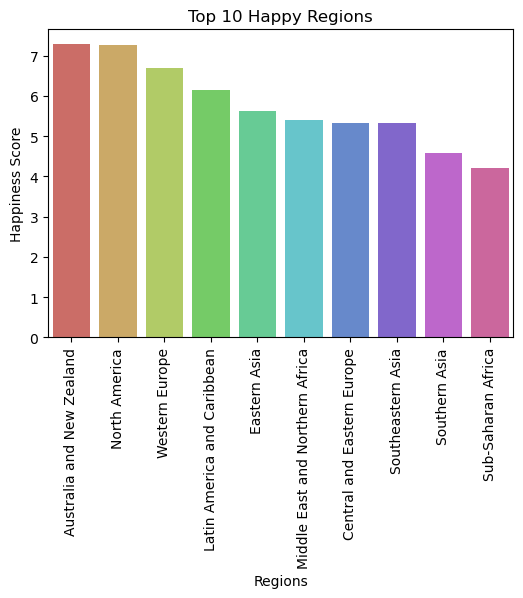

In [28]:
# plot Top 10 Happy regions
top_10_regions=sorted_grouped1.head(10)
plt.figure(figsize=(6,4)) 
sns.barplot(x='Region',y='Happiness Score',data=top_10_regions,palette='hls')
plt.title('Top 10 Happy Regions')
plt.xlabel('Regions')
plt.ylabel('Happiness Score')
plt.xticks(rotation=90)
plt.show()

Observation:  
    Australia and New Zealand are the happiest regions according to the World Happiness Report with happiness score of 7.285  
    Sub-Saharan Africa has the least happiness score of 4.2028

In [29]:
# select only numerical data for further analysis
happy_df.drop(columns=['Country','Region','Happiness Rank'], inplace=True)

In [30]:
happy_df.shape

(158, 8)

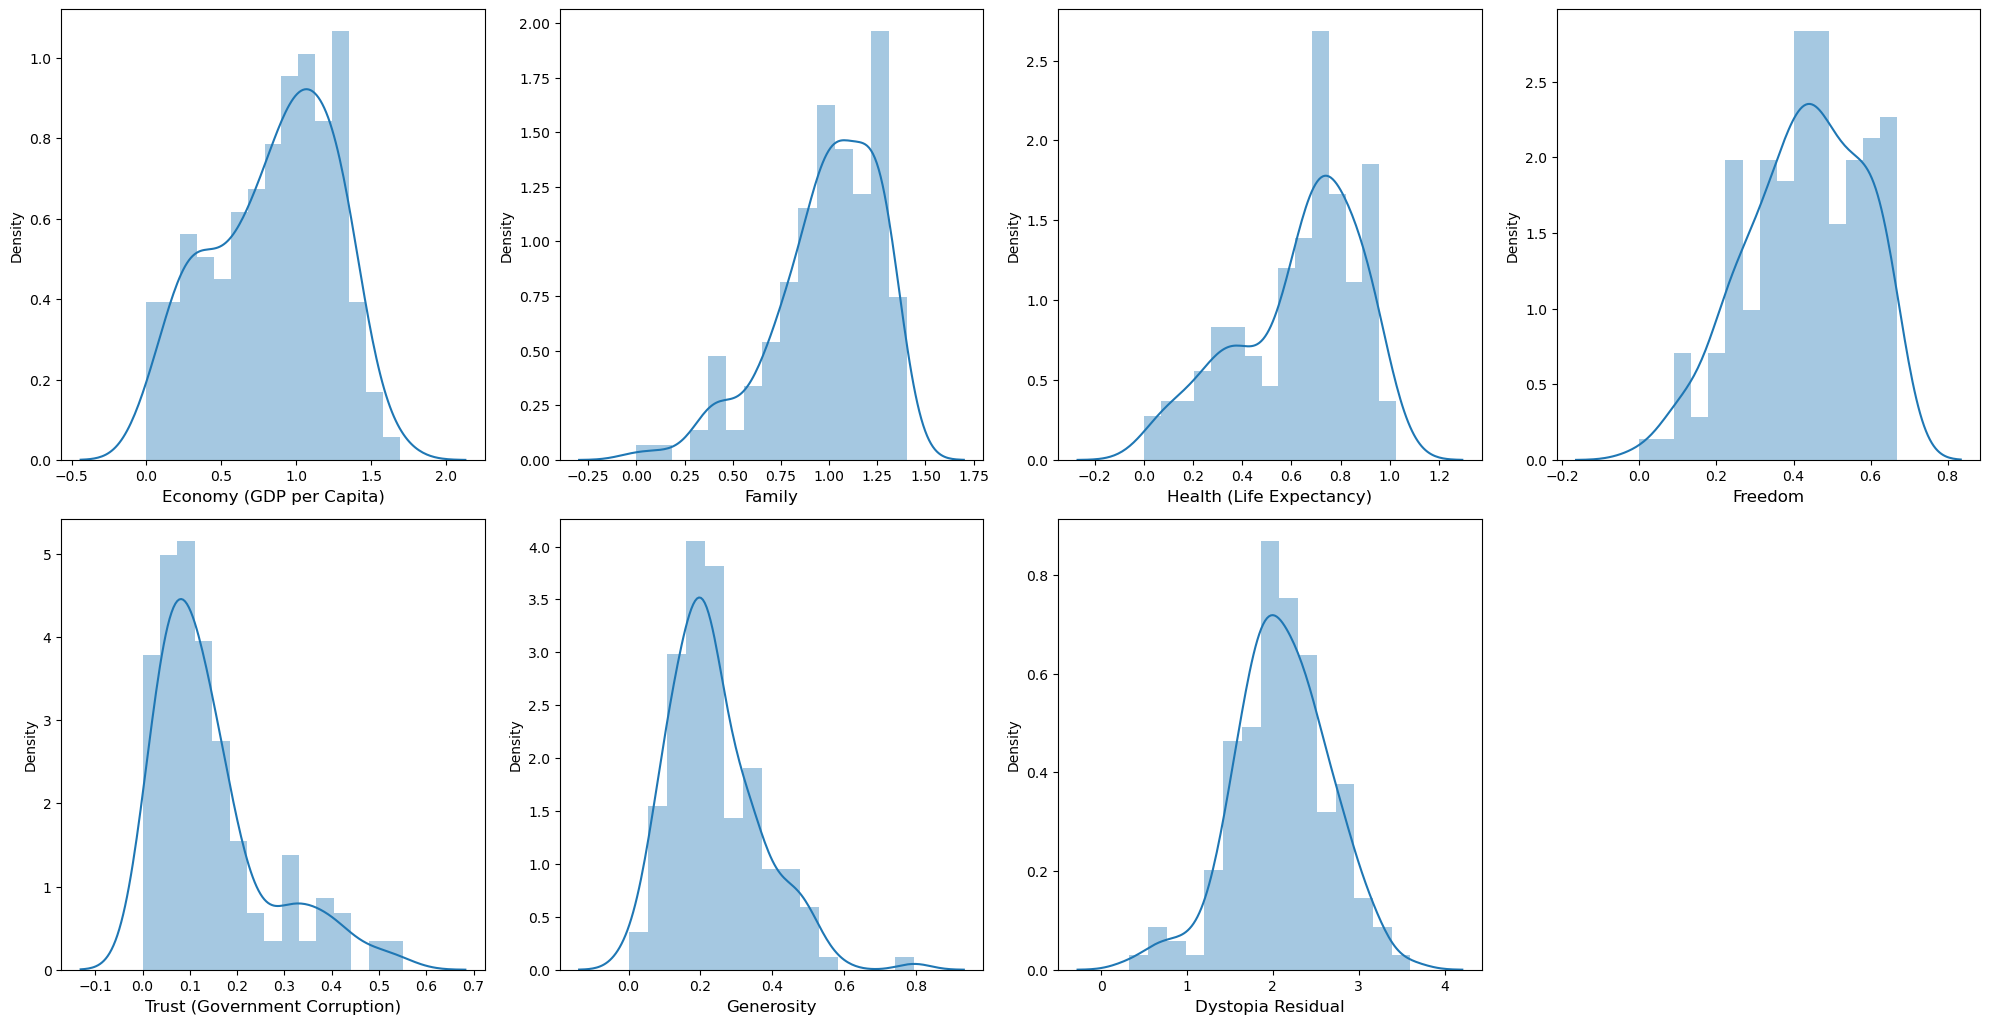

In [31]:
# data distribution
x=happy_df.drop(columns=['Happiness Score'])
plt.figure(figsize=(20,15))
plot=1
for col in x:
    if plot<=7:
        ax=plt.subplot(3,4,plot)
        sns.distplot(x[col],bins=15)
        plt.xlabel(col,fontsize=12)
    plot+=1
plt.tight_layout()

Observation:  
    Data is normally distributed.

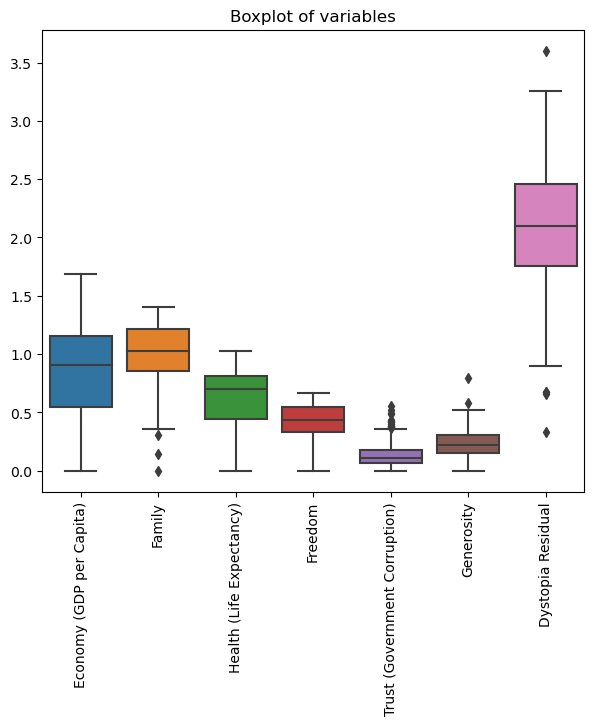

In [32]:
# check for outliers in quantitative feature using boxplot 

plt.figure(figsize=(7,6))
sns.boxplot(x)
plt.title('Boxplot of variables')
plt.xticks(rotation=90)
plt.show()

Observation:  
There are few outliers in family, trust, generosity and dystopia residual columns. But we'll proceed with the data as the outliers might indicate real-world variations and outlier-removal may lead to loss of important information.

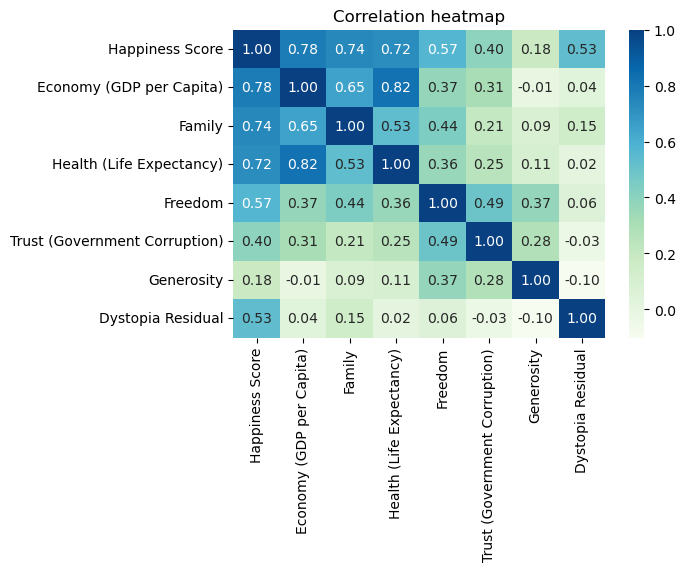

In [33]:
# check for correlation

cm= happy_df.corr()
plt.figure(figsize=(6,4))

sns.heatmap(cm, annot=True,cmap='GnBu',fmt='.2f')
plt.title('Correlation heatmap')
plt.show()

Observation:  
Happiness score is highly correlated with the other features as the features describe the extent to which these factors contribute in evaluating the happiness in each country. So we can use dimensionality reduction (PCA) for principal component selection to reduce the correlation of features for model training.

In [34]:
# Principal Component Analysis (PCA)
from sklearn.decomposition import PCA
pca=PCA()
pca.fit_transform(x)

array([[-0.61466178, -0.62606308, -0.10267379, ...,  0.08823566,
        -0.05349913,  0.10816751],
       [-0.77523499, -0.50240444, -0.15995315, ..., -0.10796613,
         0.09872213, -0.07479474],
       [-0.57044448, -0.55945854, -0.16524139, ...,  0.11961879,
        -0.01942592,  0.16672559],
       ...,
       [ 1.82839614, -0.16171035,  0.31774214, ..., -0.15657927,
         0.19427467,  0.13355716],
       [ 0.57137985,  0.99411534,  0.16176344, ..., -0.03074791,
         0.02820453,  0.1126621 ],
       [ 0.81563121,  0.82263038,  0.38144467, ...,  0.1062301 ,
        -0.08020414, -0.07493868]])

<function matplotlib.pyplot.show(close=None, block=None)>

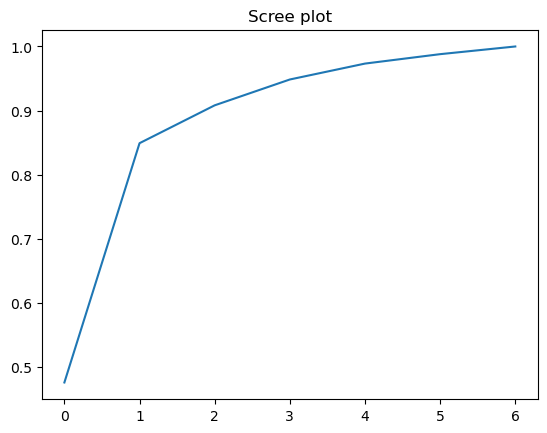

In [35]:
plt.plot(np.cumsum(pca.explained_variance_ratio_))
plt.title('Scree plot')
plt.show

Observations:  
    Elbow point is at 1 principal component but we'll be using more than 1 PCs to explain maximum variance of the dataset.

In [36]:
pca2=PCA(n_components=3)
components=pca2.fit_transform(x)
new_x=pd.DataFrame(components)
new_x.head()

,0,1,2
0,-0.614662,-0.626063,-0.102674
1,-0.775235,-0.502404,-0.159953
2,-0.570444,-0.559459,-0.165241
3,-0.567051,-0.654436,-0.090968
4,-0.524132,-0.557594,-0.133907


In [37]:
y=happy_df['Happiness Score']

# MODEL BUILDING & VALIDATION

In [38]:
# splitting dataset into training and testing sets

x_train,x_test,y_train,y_test = train_test_split(new_x,y,random_state=67)


print('x_train: ', x_train.shape,'\n','y_train: ',y_train.shape,'\n','x_test: ',x_test.shape,'\n','y_test: ',y_test.shape,'\n')

x_train:  (118, 3) 
 y_train:  (118,) 
 x_test:  (40, 3) 
 y_test:  (40,) 



In [39]:
# define functions for training and evaluation of models

from sklearn.metrics import r2_score, mean_squared_error, mean_absolute_error

def score(model,x_train,y_train,x_test,y_test,train=True):
    if train:
        y_pred1= model.predict(x_train)
    else:
        y_pred2= model.predict(x_test)
        print('R2 score: ',r2_score(y_test,y_pred2))

In [40]:
# linear Regression
from sklearn.linear_model import LinearRegression
lr=LinearRegression()
lr.fit(x_train,y_train)
score(lr,x_train,y_train,x_test,y_test,train=True)
score(lr,x_train,y_train,x_test,y_test,train=False)

R2 score:  0.964096674905369


In [41]:
# KNN
from sklearn.neighbors import KNeighborsRegressor
knr=KNeighborsRegressor()
knr.fit(x_train,y_train)
score(knr,x_train,y_train,x_test,y_test,train=True)
score(knr,x_train,y_train,x_test,y_test,train=False)

R2 score:  0.9413198655311753


In [42]:
# Decision Tree
from sklearn.tree import DecisionTreeRegressor
dtr=DecisionTreeRegressor()
dtr.fit(x_train,y_train)
score(dtr,x_train,y_train,x_test,y_test,train=True)
score(dtr,x_train,y_train,x_test,y_test,train=False)

R2 score:  0.7845325420335018


In [43]:
# Random Forest
from sklearn.ensemble import RandomForestRegressor
rfr=RandomForestRegressor()
rfr.fit(x_train,y_train)
score(rfr,x_train,y_train,x_test,y_test,train=True)
score(rfr,x_train,y_train,x_test,y_test,train=False)

R2 score:  0.9288589077501438


In [44]:
# AdaBoost
from sklearn.ensemble import AdaBoostRegressor
abr=AdaBoostRegressor()
abr.fit(x_train,y_train)
score(abr,x_train,y_train,x_test,y_test,train=True)
score(abr,x_train,y_train,x_test,y_test,train=False)

R2 score:  0.8684428966917672


In [45]:
# Gradient Boosting
from sklearn.ensemble import GradientBoostingRegressor
gbdt=GradientBoostingRegressor()
gbdt.fit(x_train,y_train)
score(gbdt,x_train,y_train,x_test,y_test,train=True)
score(gbdt,x_train,y_train,x_test,y_test,train=False)

R2 score:  0.9463454498268482


In [46]:
# XGBoost
import xgboost as xgb
xgbr=xgb.XGBRegressor()
xgbr.fit(x_train,y_train)

score(xgbr,x_train,y_train,x_test,y_test,train=True)
score(xgbr,x_train,y_train,x_test,y_test,train=False)

R2 score:  0.9169249368171764


In [47]:
# SVM
from sklearn.svm import SVR
svr=SVR()
svr.fit(x_train,y_train)
score(svr,x_train,y_train,x_test,y_test,train=True)
score(svr,x_train,y_train,x_test,y_test,train=False)

R2 score:  0.9425826107505875


In [48]:
# Evaluate the models based on metrics

models={'Linear Regression':lr, 'KNN':knr,'Decision Tree':dtr, 'Random Forest':rfr,'AdaBoost':abr,
        'Gradient Boosting':gbdt,'XGBoost':xgbr,'SVM':svr }

def evaluation(model):
    model_metrics=[]
    for name, model in models.items():
        model.fit(x_train,y_train)
        y_pred2= model.predict(x_test)
        r2=r2_score(y_test,y_pred2)
        mse=mean_squared_error(y_test,y_pred2)
        mae=mean_absolute_error(y_test,y_pred2)
        cv=cross_val_score(model,x,y,cv=5).mean()
        diff = abs(r2-cv)
        model_metrics.append({'Model':name, 'R2 score':r2, 'Mean Squared Error':mse,
                              'Mean Absolute Error':mae, 'Cross Validation':cv,'Diff btw R2 and CV': diff})
        models_table=pd.DataFrame(model_metrics)
    return models_table.sort_values(by='R2 score' ,ascending=False)

In [49]:
evaluation(models)

,Model,R2 score,Mean Squared Error,Mean Absolute Error,Cross Validation,Diff btw R2 and CV
0,Linear Regression,0.964097,0.052946,0.185639,0.999998,0.035902
5,Gradient Boosting,0.948395,0.076101,0.208520,-2.311247,3.259642
7,SVM,0.942583,0.084673,0.204971,-0.068662,1.011245
1,KNN,0.941320,0.086535,0.224165,-3.593975,4.535295
3,Random Forest,0.922190,0.114746,0.245529,-3.066224,3.988414
6,XGBoost,0.916925,0.122510,0.254697,-3.708332,4.625256
4,AdaBoost,0.863520,0.201266,0.373630,-5.913380,6.776899
2,Decision Tree,0.773520,0.333987,0.377075,-7.189912,7.963432


Observation:  
    Linear Regression is seen as the best model among the 8 models for this regression task with:
    
       * R2 score: 0.964
       * Cross Validation: 0.999
       * MSE: 0.052
       * MAE: 0.185
       * Diff btw R2 and CV scores: 0.035

In [50]:
# save the model
import joblib
if joblib.dump(lr,'Happiness_model_LR.pkl'):
    print('Model saved successfully')
else:
    print('Failed to save the model')

Model saved successfully


In [51]:
# load model and view predicted vs actual happiness scores
lr_model=joblib.load('Happiness_model_LR.pkl')
y_pred=lr_model.predict(x_test)

result=pd.DataFrame({'Predicted':y_pred,'Actual':y_test})
result.head()

,Predicted,Actual
69,5.615919,5.548
6,7.021925,7.378
73,5.297249,5.399
11,7.074186,7.226
113,4.569914,4.633


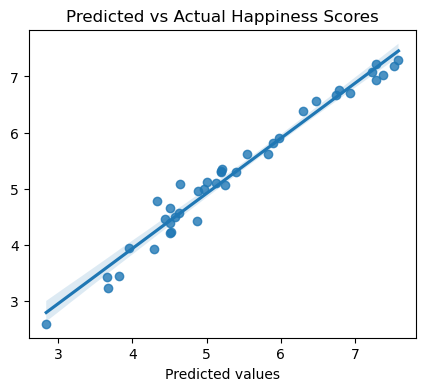

In [53]:
# plot Predicted vs Actual happiness scores
plt.figure(figsize=(5,4))
sns.regplot(x=y_test,y=y_pred,data=result)
plt.title('Predicted vs Actual Happiness Scores')
plt.xlabel('Actual values')
plt.xlabel('Predicted values')
plt.show()

Observation:  
    The Linear Regression model was able to predict Happiness Scores closer to the actual scores indicated by the closeness of datapoints around the regression line in the regplot.

# Overall Summary

The dataset on "World Happiness Report" was used to analyse and build machine learning models to predict Happiness Scores.

# Data Insights
* The dataset has maximum participation of countries from Sub-Saharan Africa region.
* Switzerland is the happiest country according to the World Happiness Report with happiness score of 7.587.
* Togo has the least happiness score of 2.839  
* Australia and New Zealand are the happiest regions according to the World Happiness Report with happiness score of 7.285    
* Sub-Saharan Africa has the least happiness score of 4.2028
  

# Selected model

Linear Regression is seen as the best model among the 8 models for this regression task with:

   * R2 score: 0.964
   * Cross Validation: 0.999
   * MSE: 0.052
   * MAE: 0.185
   * Diff btw R2 and CV scores: 0.035